<a href="https://colab.research.google.com/github/hendra136/Business_intellegence/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data and concat

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import keras
import os
import re

In [ ]:
# Load data pria.csv
mens_parfume = pd.read_csv('/content/drive/MyDrive/Botcamp Businses Intellegency/Day 33 Final Project/Assigment/Parfume E-commerce Dataset 2024/mens_perfume.csv')

# Load data wanita.csv
womens_parfume = pd.read_csv('/content/drive/MyDrive/Botcamp Businses Intellegency/Day 33 Final Project/Assigment/Parfume E-commerce Dataset 2024/womens_perfume.csv')


### Menambahkan Kolom Baru

In [ ]:
# Gabungkan data pria dan wanita berdasarkan kolom yang sama
mens_parfume['sex'] = 'men'
womens_parfume['sex'] = 'women'

ebay_parfume = pd.concat([mens_parfume, womens_parfume], ignore_index=True)


In [ ]:
# Fungsi untuk mengekstrak angka diikuti oleh 'ML' atau 'ml'
def extract_ml(title):
    match = re.search(r'(\d+\.?\d*)\s*[mM][lL]', title)
    if match:
        return float(match.group(1))
    return None

# Menambahkan kolom baru untuk volume dalam mL
ebay_parfume['volume_ml'] = ebay_parfume['title'].apply(extract_ml)
ebay_parfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sex,volume_ml
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",men,NaN
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",men,100.0
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",men,NaN
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",men,NaN
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",men,NaN


In [ ]:
# Fungsi untuk memisahkan lokasi
def split_location(location):
    parts = location.split(', ')
    if len(parts) == 3:
        return pd.Series([parts[0], parts[1], parts[2]])
    elif len(parts) == 2:
        return pd.Series([parts[0], None, parts[1]])
    else:
        return pd.Series([None, None, None])

# Terapkan fungsi ke kolom itemLocation
ebay_parfume[['City', 'State', 'Country']] = ebay_parfume['itemLocation'].apply(split_location)

# Tampilkan dataframe hasil
ebay_parfume

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sex,volume_ml,City,State,Country
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",men,NaN,Allen Park,Michigan,United States
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",men,100.0,Atlanta,Georgia,Canada
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",men,NaN,Dearborn,Michigan,United States
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",men,NaN,Reinholds,Pennsylvania,United States
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",men,NaN,Brooklyn,New York,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Eau de Parfum,13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,"May 16, 2024 22:35:29 PDT","West Palm Beach, Florida, United States",women,NaN,West Palm Beach,Florida,United States
1996,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Eau de Parfum,57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,"May 24, 2024 08:03:11 PDT","Dallas, Texas, United States",women,NaN,Dallas,Texas,United States
1997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",1,30.96,US $30.96,2.0,2 available / 3 sold,3.0,"May 17, 2024 23:16:41 PDT","New York, New York, United States",women,NaN,New York,New York,United States
1998,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Eau de Perfume,53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,"May 13, 2024 22:19:34 PDT","Dallas, Texas, United States",women,NaN,Dallas,Texas,United States


# View Basic data information

In [ ]:
mens_parfume.shape

(1000, 11)

In [ ]:
womens_parfume.shape

(1000, 11)

In [ ]:
ebay_parfume.shape

(2000, 15)

In [ ]:
ebay_parfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sex,volume_ml,City,State,Country
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",men,NaN,Allen Park,Michigan,United States
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",men,100.0,Atlanta,Georgia,Canada
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",men,NaN,Dearborn,Michigan,United States
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",men,NaN,Reinholds,Pennsylvania,United States
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",men,NaN,Brooklyn,New York,United States


In [ ]:
ebay_parfume.isnull().sum()

brand                   2
title                   0
type                    5
price                   0
priceWithCurrency       0
available             242
availableText          11
sold                   22
lastUpdated           126
itemLocation            0
sex                     0
volume_ml            1215
City                   12
State                 171
Country                12
dtype: int64

In [ ]:
ebay_parfume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1998 non-null   object 
 1   title              2000 non-null   object 
 2   type               1995 non-null   object 
 3   price              2000 non-null   float64
 4   priceWithCurrency  2000 non-null   object 
 5   available          1758 non-null   float64
 6   availableText      1989 non-null   object 
 7   sold               1978 non-null   float64
 8   lastUpdated        1874 non-null   object 
 9   itemLocation       2000 non-null   object 
 10  sex                2000 non-null   object 
 11  volume_ml          785 non-null    float64
 12  City               1988 non-null   object 
 13  State              1829 non-null   object 
 14  Country            1988 non-null   object 
dtypes: float64(4), object(11)
memory usage: 234.5+ KB


In [ ]:
# Menampilkan data yang memiliki nilai Null
null_data = ebay_parfume[ebay_parfume['available'].isnull()]
null_data

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sex,volume_ml,City,State,Country
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",men,NaN,Brooklyn,New York,United States
7,Unbranded,Parfums De-Marly-Haltane Eau de Parfum spray 4...,Eau de Parfum,85.00,US $85.00,NaN,Last One / 6 sold,6.0,"May 24, 2024 00:10:39 PDT","Ithaca, New York, United States",men,NaN,Ithaca,New York,United States
20,Dolce & Gabbana,Light Blue by Dolce & Gabbana 4.2 oz Cologne f...,Eau de Toilette,29.94,US $29.94/ea,NaN,"Limited quantity available / 9,208 sold",9208.0,"May 23, 2024 20:04:11 PDT","Hackensack, New Jersey, United States",men,NaN,Hackensack,New Jersey,United States
29,Penhaligon's,Penhaligon's The Tragedy of Lord George 2.5oz ...,Eau de Parfum,99.99,US $99.99,NaN,Last One / 30 sold,30.0,"May 20, 2024 04:16:27 PDT","Brenham, Texas, United States",men,NaN,Brenham,Texas,United States
36,Rasasi,Rasasi Men's Hawas EDP Spray 3.4 oz Fragrances...,Eau de Parfum,45.11,US $45.11,NaN,Limited quantity available / 258 sold,258.0,"May 24, 2024 09:50:28 PDT","Brooklyn, New York, United States",men,NaN,Brooklyn,New York,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,Gucci,Gucci Guilty 1.7 oz EDT Perfume for Women New ...,Eau de Toilette,64.58,US $64.58,NaN,Limited quantity available / 275 sold,275.0,"May 21, 2024 15:16:00 PDT","Hackensack, New Jersey, United States",women,NaN,Hackensack,New Jersey,United States
1982,As Show,Carmina By Creed2.5 oz / 75 ml Eau De Parfum F...,Eau de Parfum/Perfume,124.99,US $124.99,NaN,Last One / 3 sold,3.0,"May 24, 2024 00:32:54 PDT","USA, New Jersey, Hong Kong",women,75.0,USA,New Jersey,Hong Kong
1983,Burberry,Burberry Her ELIXIR DE PARFUM EDP Intense-Delu...,Eau de Parfum,13.00,US $13.00,NaN,NaN,NaN,NaN,"Chino, California, United States",women,NaN,Chino,California,United States
1990,United Colors of Benetton,United Colors of Benetton MINI COLORS FEMME WO...,Eau de Toilette,24.99,US $24.99,NaN,4 lots available (8 items per lot) / 79 sold,79.0,"Mar 26, 2024 11:45:52 PDT","Brooklyn, New York, United States",women,4.0,Brooklyn,New York,United States


In [ ]:
# Menghitung persentase nilai NaN/Null di setiap kolom
nan_percentage = ebay_parfume.isnull().mean() * 100
nan_percentage

brand                 0.10
title                 0.00
type                  0.25
price                 0.00
priceWithCurrency     0.00
available            12.10
availableText         0.55
sold                  1.10
lastUpdated           6.30
itemLocation          0.00
sex                   0.00
volume_ml            60.75
City                  0.60
State                 8.55
Country               0.60
dtype: float64

In [ ]:
# Menghitung persentase nilai NaN/Null di setiap kolom
ML = ebay_parfume.isnull().mean() * 100
ML

brand                 0.10
title                 0.00
type                  0.25
price                 0.00
priceWithCurrency     0.00
available            12.10
availableText         0.55
sold                  1.10
lastUpdated           6.30
itemLocation          0.00
sex                   0.00
volume_ml            60.75
City                  0.60
State                 8.55
Country               0.60
dtype: float64

In [ ]:
# Menampilkan semua nilai unik dalam kolom 'type'
# Gantilah 'type' dengan nama kolom yang sesuai jika berbeda
type_column_values = ebay_parfume['type'].unique()

print("Isi data string pada kolom 'type':")
for value in type_column_values:
    print(value)

Isi data string pada kolom 'type':
Eau de Parfum
Eau de Toilette
Fragrances
Perfume
/
PARFUM
Parfum
Concentrated Uncut Pure Body Oil
LE PARFUM
Eau De Parfum
nan
Unscented
Eau de Cologne
~ THE ONE EAU DE PARFUM SPRAY ~
EXTRAIT DE PARFUM
Eau De Toilette
Eau De Parfum Intense
Pheromone
Aftershave
Fragrance & Perfume
Eau de Perfume
Jo Malone Cologne Intense Spray
Y
Gift Sets
Fragrance Rolling Ball
Body Spray
Eau de toilette
Eau de Toillette
Eau De Toilette, Eau De Parfum, Eau De Parfum Intense
Cologne
le parfum
Eau de Toilette Intense
Eau de Cologne Spray, Cologne Spray
Extrait De Parfum
Fine Cologne
Does not apply
EDT
Extrait de Parfum
Editions Parfums
DIOR HOMME COLOGNE
Deodorant
De Nuit
Eau de Toilette, Cologne Spray
Parfum Intense
Eau de Parfum Intense
cologne
EAU DE COLOGNE SPRAY
Roll On
Elixir de Parfum
Elixir
Various
Assorted
Fragrance Oil
Eau de Parfum/ Eau de Toilette
Deodorant Body Spray
Oil
Splash-on
edt
EDC
Car Air Freshener
Eau De Cologne
Fragrance Body Spray
Body Oil
Cologne 



*   Terdapat data yang hilang pada beberapa kolom. sehingga kita perlu melakukan proses Clean Missing value
*   Terdapat anomali data pada type sehingga perlu di lakukan proses preprocessing data untuk menyesuaikannya dengan format



## Clean Missing and Normalize Value

### Clean Missing Data

In [ ]:
# Mengganti nilai NaN/Null dengan modus atau median
for column in ebay_parfume.columns:
    if ebay_parfume[column].dtype == 'object':  # Kategorikal (string/object)
        mode_value = ebay_parfume[column].mode()[0]
        ebay_parfume[column].fillna(mode_value, inplace=True)
    else:  # Numerik
        median_value = ebay_parfume[column].median()
        ebay_parfume[column].fillna(median_value, inplace=True)

In [ ]:
ebay_parfume.isnull().sum()

brand                0
title                0
type                 0
price                0
priceWithCurrency    0
available            0
availableText        0
sold                 0
lastUpdated          0
itemLocation         0
sex                  0
volume_ml            0
City                 0
State                0
Country              0
dtype: int64

Data sudah bersih dari Null. selanjutnya melakukan proses Normalize untuk membersihkan data yang tidak sesuai format pada kolom.

### Normalize Data

In [ ]:
# Normalisasi nilai dengan mengabaikan case sensitivity dan menghapus leading/trailing whitespace
def normalize_value(value):
    return value.strip().lower()
# Kategorisasi nilai yang dinormalisasi
def categorize_type(normalized_value):
    if normalized_value in [
        "eau de parfum", "extrait de parfum", "eau de parfum intense", "eau de perfume", "elixir de parfum",
        "eau de parfum 2 pcs set", "l'eau de parfum", "eau de parfume", "edp and parfum", "eau de parfum supreme",
        "eau de parfum spray (unisex tester) 3.4 oz", "esprit de parfum", "eau de parfum 3 pcs set", "edp"
    ]:
        return "Eau de Parfum"
    elif normalized_value in [
        "eau de toilette spray 3.4 oz", "toilette spray", "eau de toilette, spray", "eau de toilette intense",
        "eau de toilette", "eau de toillette", "eau de toilette"
    ]:
        return "Eau de Toilette"
    elif normalized_value in [
        "cologne spray", "shimmering body oil", "parfum, lotion, gloss and blush", "lotion", "cologne spray",
        "eau de cologne", "edc", "eau de cologne spray", "cologne", "dior homme cologne", "fine cologne",
        "jo malone cologne intense spray"
    ]:
        return "Eau de Cologne"
    elif normalized_value in [
        "fragrance body mist", "extract parfum", "body mist", "perfume fragrance mist", "fine fragrance mist",
        "fragrance mist", "fragrance body spray", "fragrance oil", "fragrance rolling ball", "concentrated uncut pure body oil"
    ]:
        return "Fragrances"
    else:
        return "Perfume"

# Proses normalisasi dan kategorisasi
ebay_parfume['type'] = ebay_parfume['type'].apply(lambda x: categorize_type(normalize_value(x)))

In [ ]:

# Fungsi untuk mengganti 'USA' menjadi 'United States'
def normalize_location(location):
    return location.replace('USA', 'United States')

# Terapkan fungsi ke kolom itemLocation
ebay_parfume['itemLocation'] = ebay_parfume['itemLocation'].apply(normalize_location)

# Normalisasi data dalam kolom City dan State jika ada 'USA'
ebay_parfume['City'] = ebay_parfume['City'].apply(normalize_location)
ebay_parfume['State'] = ebay_parfume['State'].apply(normalize_location)

In [ ]:
# Menampilkan nilai unik dari kolom 'type'
unique_types = ebay_parfume['type'].unique()
unique_types

array(['Eau de Parfum', 'Eau de Toilette', 'Perfume', 'Fragrances',
       'Eau de Cologne'], dtype=object)

In [ ]:
# Menampilkan kolom type setelah dilakukan Normalize

for col in ebay_parfume.columns:
  print(f'====={col}=====')
  print(ebay_parfume[col].value_counts())
  print('\n')

=====brand=====
brand
Giorgio Armani        74
Dolce&Gabbana         62
Yves Saint Laurent    55
Versace               53
Unbranded             50
                      ..
MONT BLANC LEGEND      1
Coty Inc.              1
REYANE TRADITION       1
Classic Brands         1
Juliette Has A Gun     1
Name: count, Length: 401, dtype: int64


=====title=====
title
YSL Yves Saint Laurent Y Eau de Perfume Spray Cologne For Men 3.3 oz 100ML          4
Hawas for him Eau De Parfum By Rasasi 100ml 3.4 FL OZ NEW                           4
Idole by Lancome Eau de Parfum EDP Perfume for Women 2.5 oz New in Box              4
Good Girl by Carolina Herrera 2.7 oz Eau De Parfum Spray Women's New & Sealed       3
New 2024 Sexy Cologne Cupid Hypnosis Long Lasting Pheromone Perfume for Men         3
                                                                                   ..
Halloween Man X by Jesus Del Pozo 4.2 oz EDT Cologne for Men New In Box             1
CHANEL Allure Homme Sport 3.4 Oz Men E

Data sudah di pastikan tidak ada Null dan sudah melakukan Normalize data pada kolom type sehinnga selanjutnya bisa dilakukan analisis

In [ ]:
ebay_parfume.describe()

,price,available,sold,volume_ml
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.187090,19.430500,626.077500,91.163075
std,32.619625,53.348479,2457.175088,31.923656
min,1.990000,2.000000,1.000000,0.800000
25%,21.972500,6.000000,15.000000,100.000000
50%,34.040000,10.000000,51.000000,100.000000
75%,53.990000,10.000000,278.250000,100.000000
max,299.990000,842.000000,54052.000000,250.000000


# Marketing Analysis

## Analysis of the Perfume Listings Data

### Brand Distibution

Memahami brand manakah yang menjadi tren pasar

### Brand berdasarkan ketersedian produk

In [ ]:
# Menghitung brand tersedia
brand_av = ebay_parfume.groupby('brand')['available'].sum().reset_index()

# Mengurutkan brand berdasarkan ketersedeian
top_brands_sales = brand_av.sort_values(by='available', ascending=False).head(10)

# Menampilkan brand
top_brands_sales.head()

,brand,available
320,Ralph Lauren,1735.0
74,Calvin Klein,1619.0
201,Juicy Couture,1158.0
372,Versace,1121.0
64,Burberry,1086.0


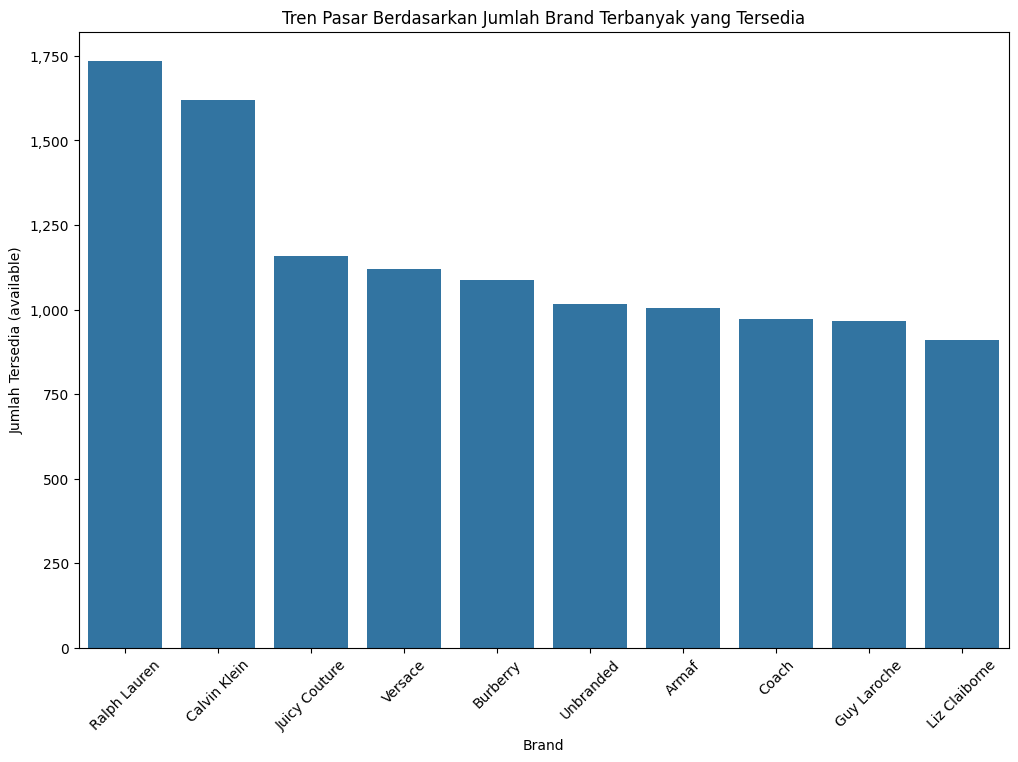

In [ ]:
# Fungsi untuk format y-axis dengan pemisah ribuan
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Visualisasi tren pasar berdasarkan jumlah brand yang tersedia
plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='available', data=top_brands_sales)
plt.title('Tren Pasar Berdasarkan Jumlah Brand Terbanyak yang Tersedia')
plt.xlabel('Brand')
plt.ylabel('Jumlah Tersedia (available)')

# Menggunakan FuncFormatter untuk mengubah format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation=45)
plt.show()

### Brand berdasarkan penjualan

In [ ]:
# Menghitung total penjualan (sold) untuk setiap brand
brand_sales = ebay_parfume.groupby('brand')['sold'].sum().reset_index()

# Mengurutkan brand berdasarkan total penjualan
top_brands_sales = brand_sales.sort_values(by='sold', ascending=False).head(10)

# Menampilkan brand
top_brands_sales.head()

,brand,sold
74,Calvin Klein,145672.0
372,Versace,128077.0
101,Davidoff,60289.0
44,Azzaro,38305.0
64,Burberry,38103.0


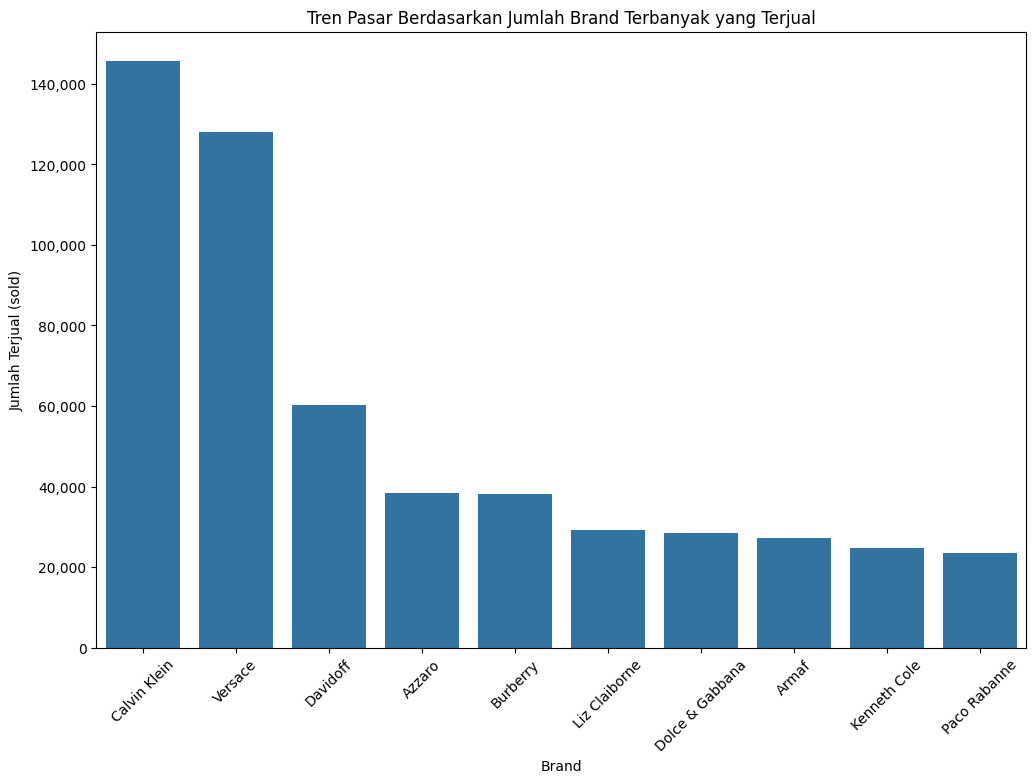

In [ ]:
# Fungsi untuk format y-axis dengan pemisah ribuan
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Visualisasi tren pasar berdasarkan jumlah brand terbanyak yang terjual
plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='sold', data=top_brands_sales)
plt.title('Tren Pasar Berdasarkan Jumlah Brand Terbanyak yang Terjual')
plt.xlabel('Brand')
plt.ylabel('Jumlah Terjual (sold)')

# Menggunakan FuncFormatter untuk mengubah format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation=45)
plt.show()

# Price Optimalization

## BoxPlot Parfume

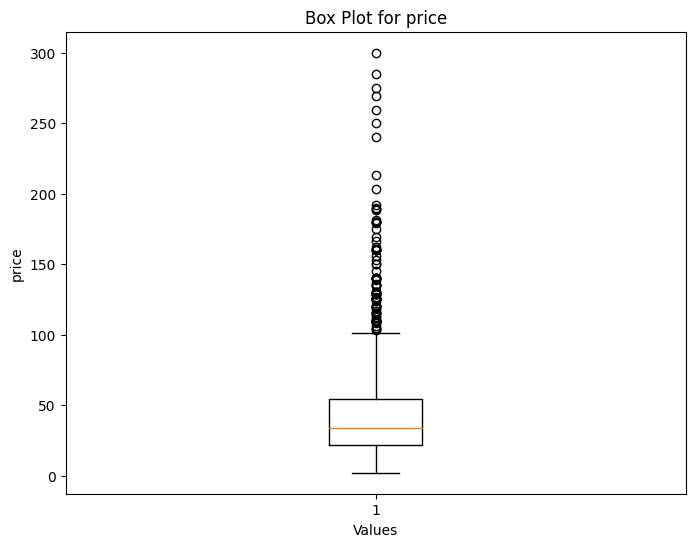

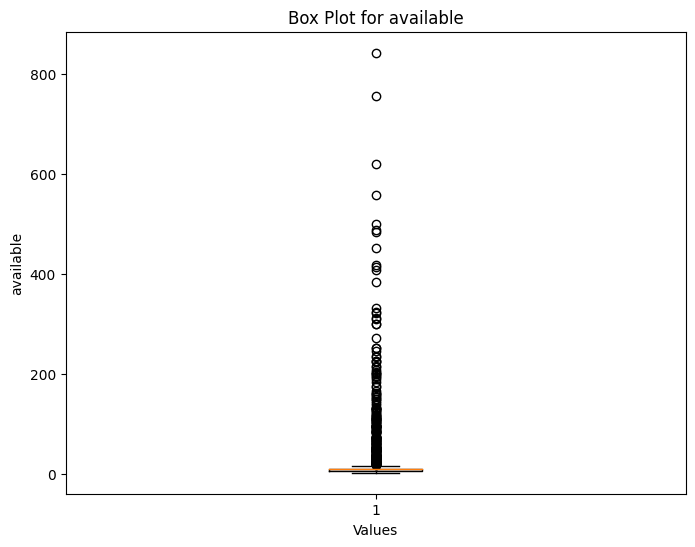

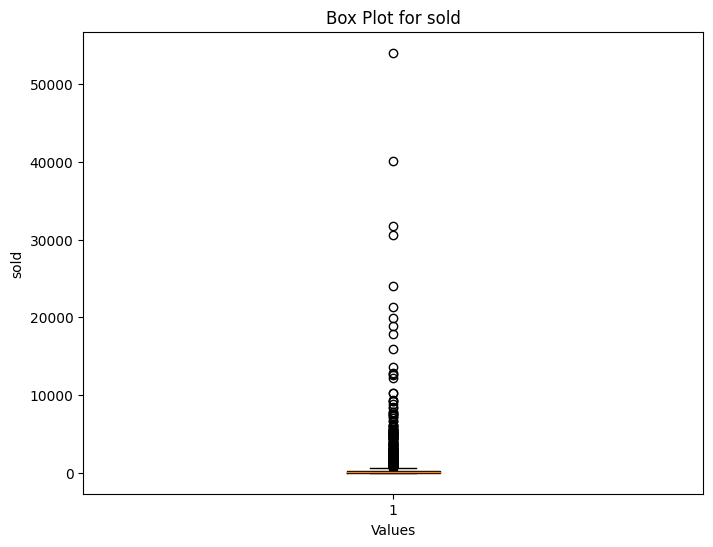

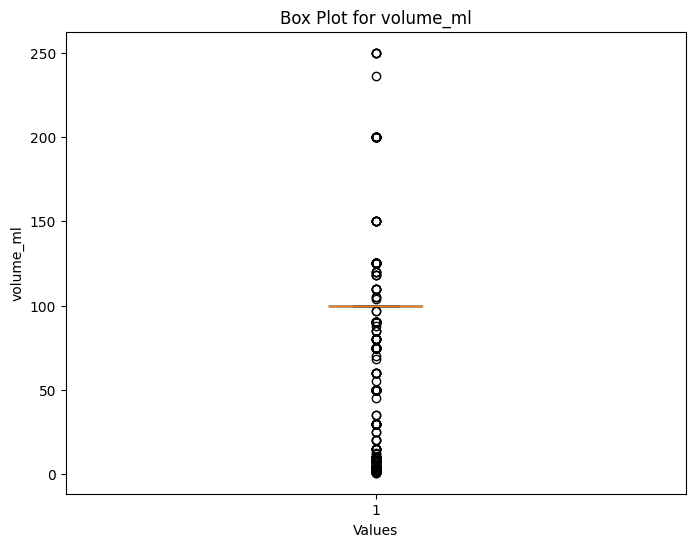

In [ ]:
# check for outliers

# Select numerical columns for analysis
numerical_columns = ebay_parfume.select_dtypes(include=[np.number])

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(ebay_parfume[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel("Values")
    plt.ylabel(col)
    plt.show()

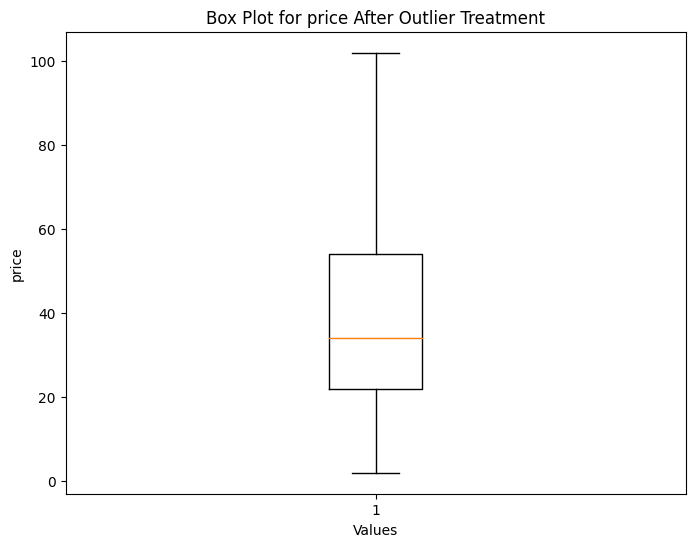

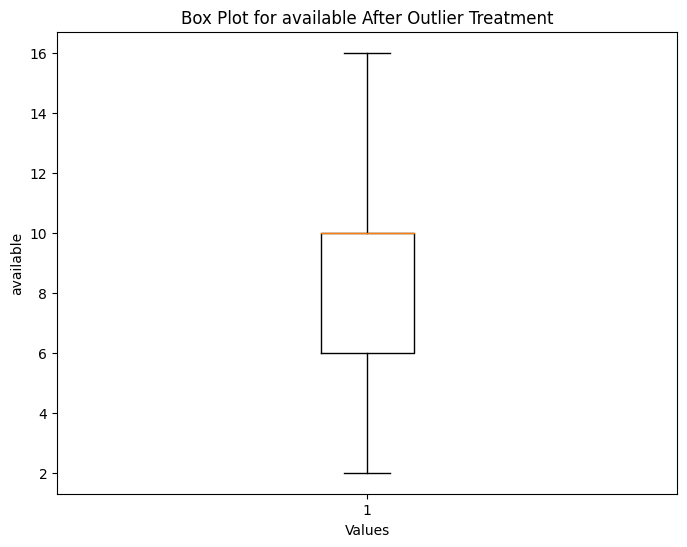

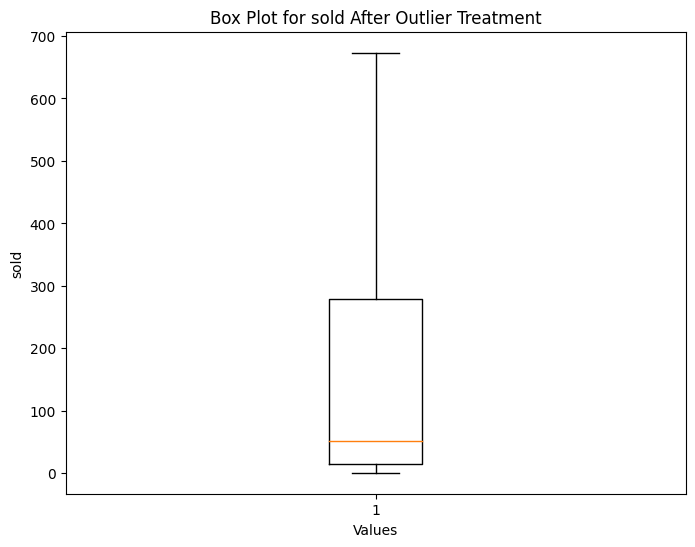

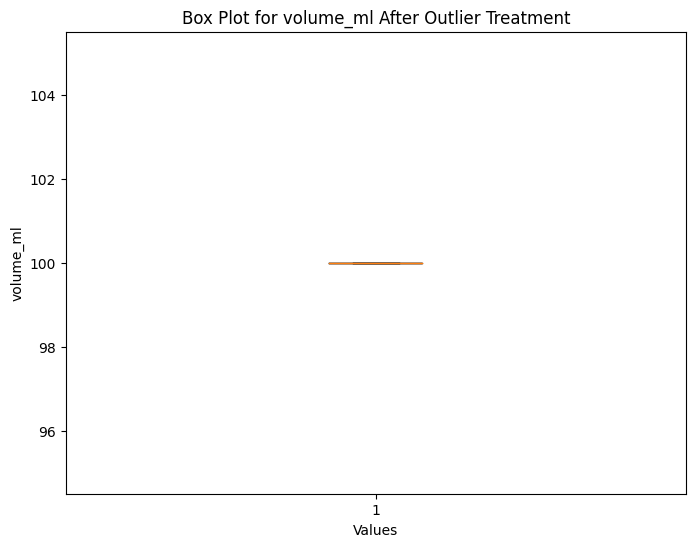

In [ ]:
# treat outliers
numerical_columns = ebay_parfume.select_dtypes(include=[np.number])

# Function to identify and treat outliers
def treat_outliers(ebay_parfume, col):
    q1 = ebay_parfume[col].quantile(0.25)
    q3 = ebay_parfume[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Identify outliers based on IQR
    outliers = ebay_parfume[(ebay_parfume[col] > upper_bound) | (ebay_parfume[col] < lower_bound)]


    # Winsorization (capping to bounds)
    ebay_parfume.loc[outliers.index, col] = np.clip(outliers[col], lower_bound, upper_bound)

    return ebay_parfume

# Apply outlier treatment to each numerical column
for col in numerical_columns:
    ebay_parfume = treat_outliers(ebay_parfume, col)

# Create box plots after outlier treatment
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(ebay_parfume[col])
    plt.title(f"Box Plot for {col} After Outlier Treatment")
    plt.xlabel("Values")
    plt.ylabel(col)
    plt.show()

## Price Analysis

Menganalisis kisaran harga dapat membantu mengidentifikasi parfum termahal dan paling murah, serta tren harga rata-rata.

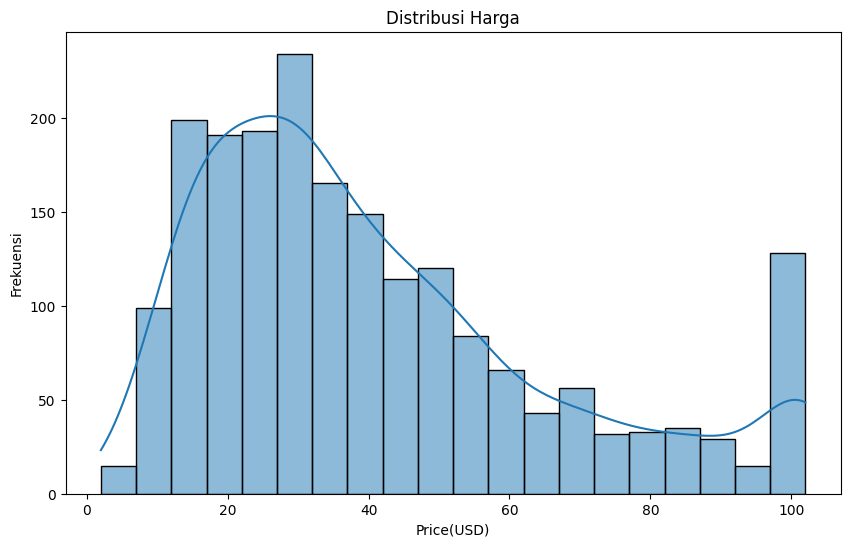

In [ ]:
# Analisis distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(ebay_parfume['price'], kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Price(USD)')
plt.ylabel('Frekuensi')
plt.show()

1. Histogram menunjukan distribusi harga parfum, yang menunjukan bahwa sebagaian besar harga parfum memiliki harga di bawah $50.
2. distibusi parfumnya cenderung ke kanan dengan ekor yang panjang mengarah ke harga yang lebih tinggi

In [ ]:
# Analisis pendapatan berdasarkan harga
# Mengasumsikan bahwa terdapat kolom 'quantity' yang menunjukkan jumlah barang terjual
ebay_parfume['revenue'] = ebay_parfume['price'] * ebay_parfume['sold']
price_revenue = ebay_parfume.groupby('price')['revenue'].sum().reset_index()

# Menambahkan kolom profit
ebay_parfume['profit'] = ebay_parfume['revenue'] - ebay_parfume['price']

# Menampilkan data pendapatan dan profit berdasarkan harga
price_revenue.head()

,price,revenue
0,1.99,1339.51875
1,3.00,12.00000
2,3.50,2355.93750
3,4.95,4752.61875
4,5.50,2970.00000


In [ ]:
ebay_parfume.describe()

,price,available,sold,volume_ml,revenue,profit
count,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000
mean,41.157161,8.680000,185.924937,100.0,6510.840456,6469.683295
std,25.355961,3.807998,242.710827,0.0,10009.401945,10005.314323
min,1.990000,2.000000,1.000000,100.0,12.000000,0.000000
25%,21.972500,6.000000,15.000000,100.0,529.092500,485.672500
50%,34.040000,10.000000,51.000000,100.0,1814.515000,1766.120000
75%,53.990000,10.000000,278.250000,100.0,8885.952500,8850.992500
max,102.016250,16.000000,673.125000,100.0,68669.688281,68567.672031


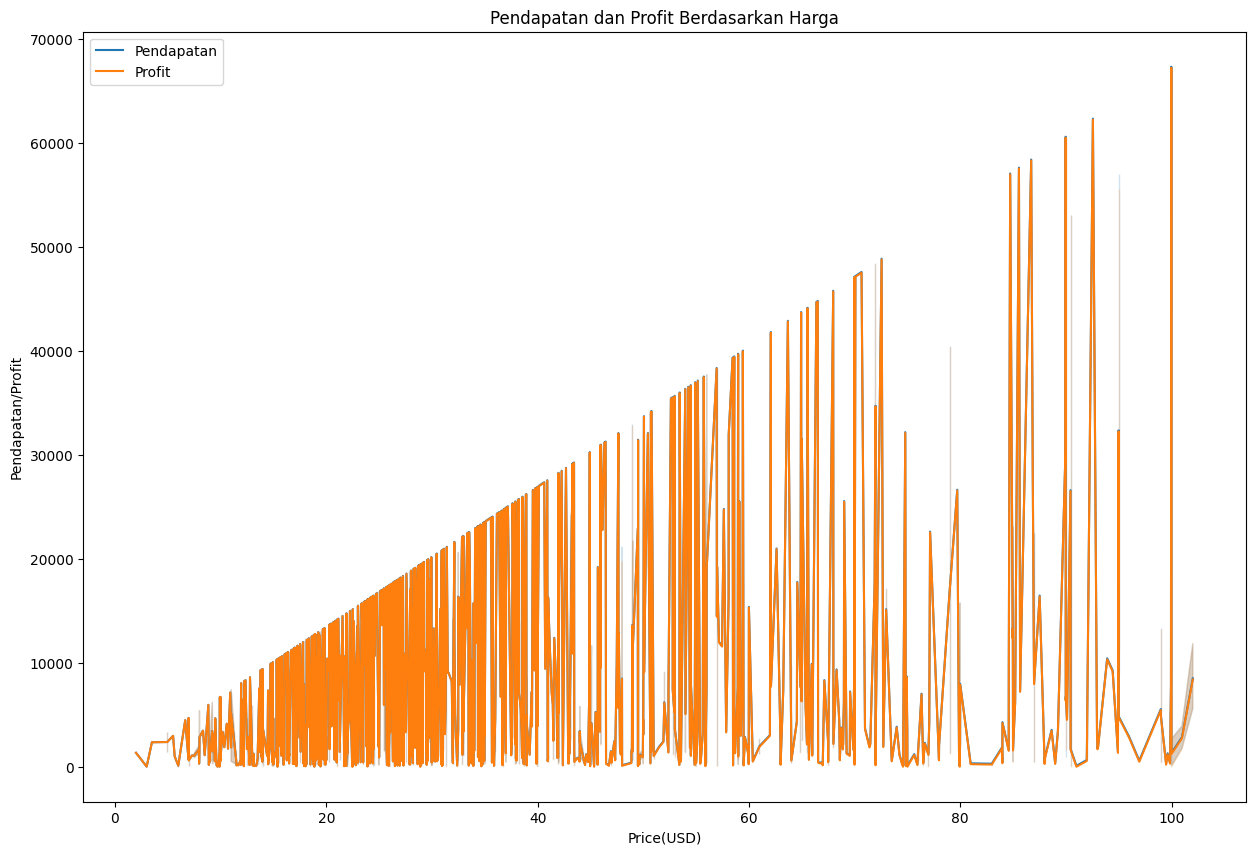

In [ ]:
# Visualisasi pendapatan berdasarkan harga
plt.figure(figsize=(15, 10))
sns.lineplot(x='price', y='revenue', data=ebay_parfume, label='Pendapatan')
sns.lineplot(x='price', y='profit', data=ebay_parfume, label='Profit')
plt.title('Pendapatan dan Profit Berdasarkan Harga')
plt.xlabel('Price(USD)')
plt.ylabel('Pendapatan/Profit')
plt.legend()
plt.show()


In [ ]:
# Mengidentifikasi harga optimal
optimal_price = price_revenue.loc[price_revenue['revenue'].idxmax()]
print(f"Harga optimal yang dapat memaksimalkan pendapatan adalah: ${optimal_price['price']} dengan pendapatan sebesar ${optimal_price['revenue']}")

Harga optimal yang dapat memaksimalkan pendapatan adalah: $102.01625 dengan pendapatan sebesar $764535.2815625


## Availability and Sales Performance

Menganalisis ketersediaan dan penjualan dapat membantu memahami permintaan pasar dan tingkat stok.

In [ ]:
# Analisis jumlah penjualan berdasarkan tipe produk
sales_by_type = ebay_parfume.groupby('type')['sold'].sum().reset_index()
print(sales_by_type)

              type        sold
0   Eau de Cologne   20370.125
1    Eau de Parfum  147597.625
2  Eau de Toilette  172017.000
3       Fragrances    1826.125
4          Perfume   30039.000


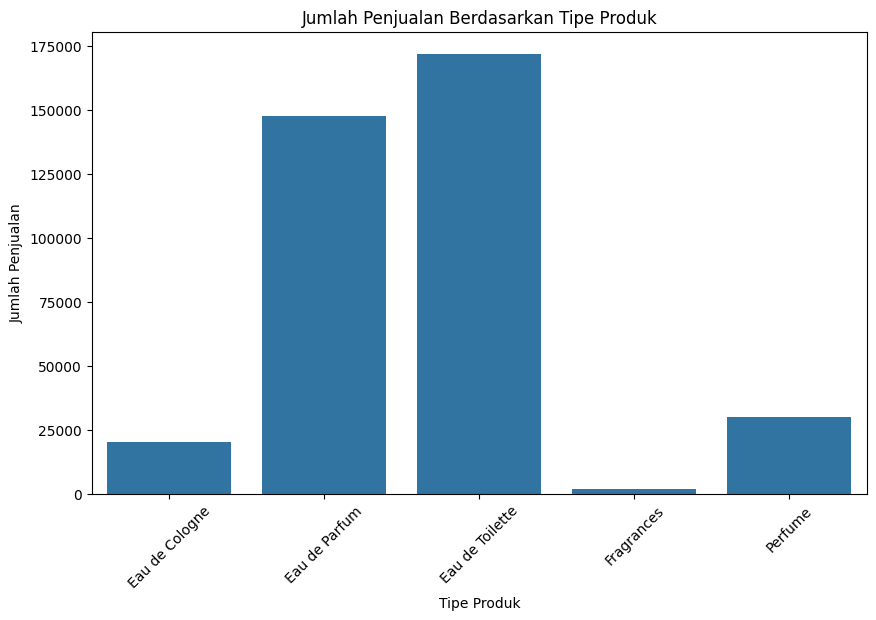

In [ ]:
# Visualisasi jumlah penjualan berdasarkan tipe produk
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='sold', data=sales_by_type)
plt.title('Jumlah Penjualan Berdasarkan Tipe Produk')
plt.xlabel('Tipe Produk')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.show()

Penjualan parfume Eau De Toilete lebih banyak diminati kemudian Eau De Parfum

In [ ]:
# Analisis jumlah penjualan berdasarkan tipe produk
sales_by_type = ebay_parfume.groupby('volume_ml')['sold'].sum().reset_index()
print(sales_by_type)

   volume_ml        sold
0      100.0  371849.875


In [ ]:
# Menghitung total penjualan berdasarkan volume_ml
sales_by_volume = ebay_parfume.groupby('volume_ml')['sold'].sum().reset_index()
# Mengurutkan berdasarkan jumlah penjualan dan mengambil 10 besar
top_10_sales = sales_by_volume.sort_values(by='sold', ascending=False).head(10)
top_10_sales

,volume_ml,sold
0,100.0,371849.875


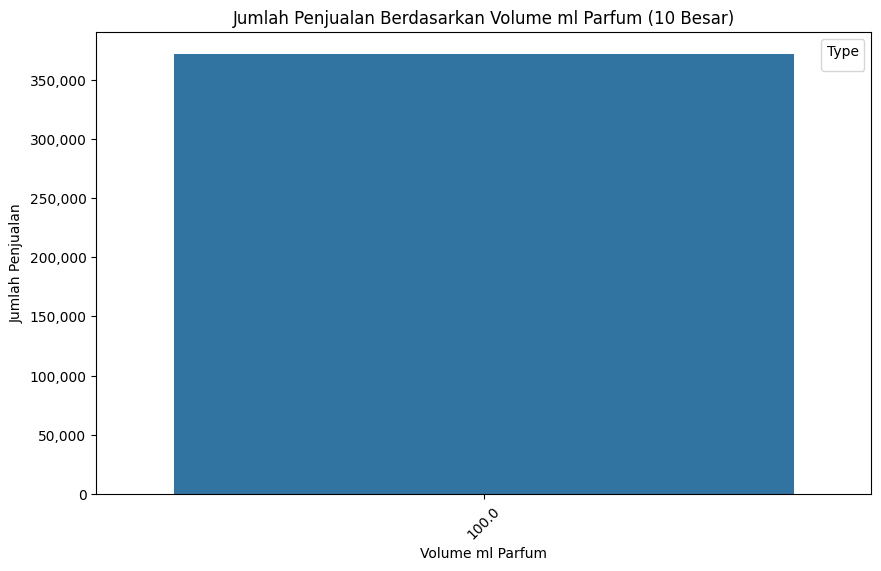

In [ ]:
# import plugin
from matplotlib.ticker import FuncFormatter
# Visualisasi jumlah penjualan berdasarkan volume ml
plt.figure(figsize=(10, 6))
sns.barplot(x='volume_ml', y='sold', data=top_10_sales)
plt.title('Jumlah Penjualan Berdasarkan Volume ml Parfum (10 Besar)')
plt.xlabel('Volume ml Parfum')
plt.ylabel('Jumlah Penjualan')

# Fungsi untuk format y-axis dengan pemisah ribuan
def thousands_formatter(x, pos):
    return f'{int(x):,}'
# Menggunakan FuncFormatter untuk mengubah format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

Parfum dengan penjualan terbanyak adalah 100ml

In [ ]:
# Menghitung total penjualan berdasarkan type dan volume_ml
sales_by_type_and_volume = ebay_parfume.groupby(['type', 'volume_ml'])['sold'].sum().reset_index()

# Mengurutkan berdasarkan jumlah penjualan dan mengambil 10 besar
top_10_sales = sales_by_type_and_volume.sort_values(by='sold', ascending=False).head(10)

print("Analisis penjualan parfum terbanyak berdasarkan tipe dan volume ml:")
top_10_sales.head(10)

Analisis penjualan parfum terbanyak berdasarkan tipe dan volume ml:


,type,volume_ml,sold
2,Eau de Toilette,100.0,172017.000
1,Eau de Parfum,100.0,147597.625
4,Perfume,100.0,30039.000
0,Eau de Cologne,100.0,20370.125
3,Fragrances,100.0,1826.125


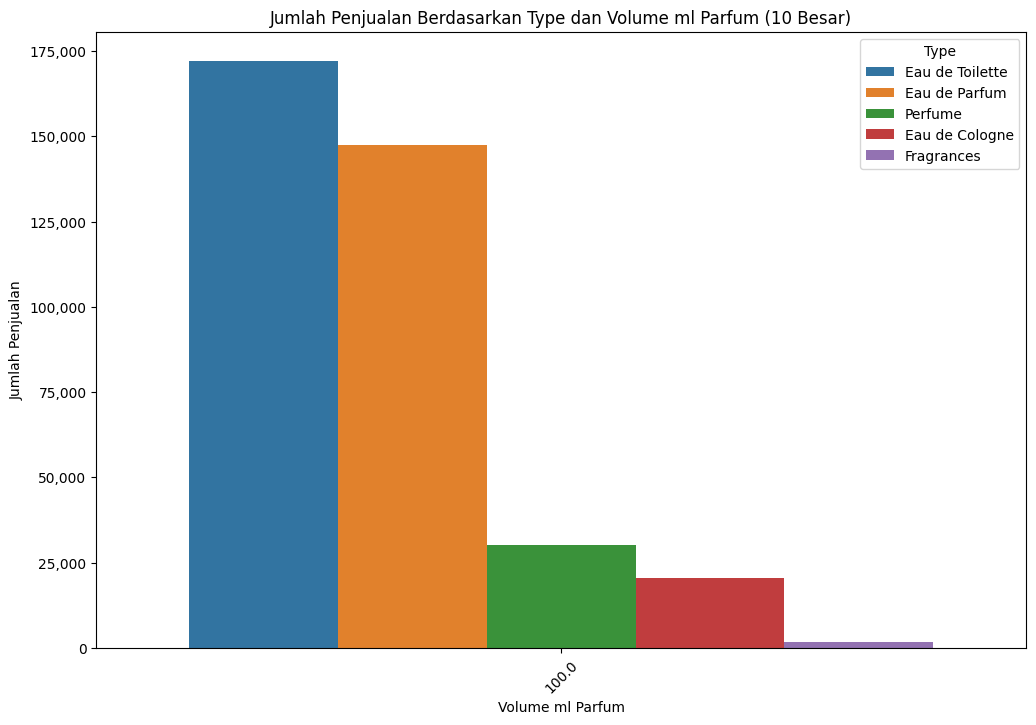

In [ ]:
# import plugin
from matplotlib.ticker import FuncFormatter
# Visualisasi jumlah penjualan berdasarkan type dan volume ml
plt.figure(figsize=(12, 8))
sns.barplot(x='volume_ml', y='sold', hue='type', data=top_10_sales)
plt.title('Jumlah Penjualan Berdasarkan Type dan Volume ml Parfum (10 Besar)')
plt.xlabel('Volume ml Parfum')
plt.ylabel('Jumlah Penjualan')

# Fungsi untuk format y-axis dengan pemisah ribuan
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Menggunakan FuncFormatter untuk mengubah format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

Berdasarkan hasil analisis. didapatkan bahwa parfume dengan penjualan terlaris ada pada type **Eau de toilete** dengan jumlah ml terbanyak terjual **100 ml**

Average Availability: 8.68
Average Sold: 185.92


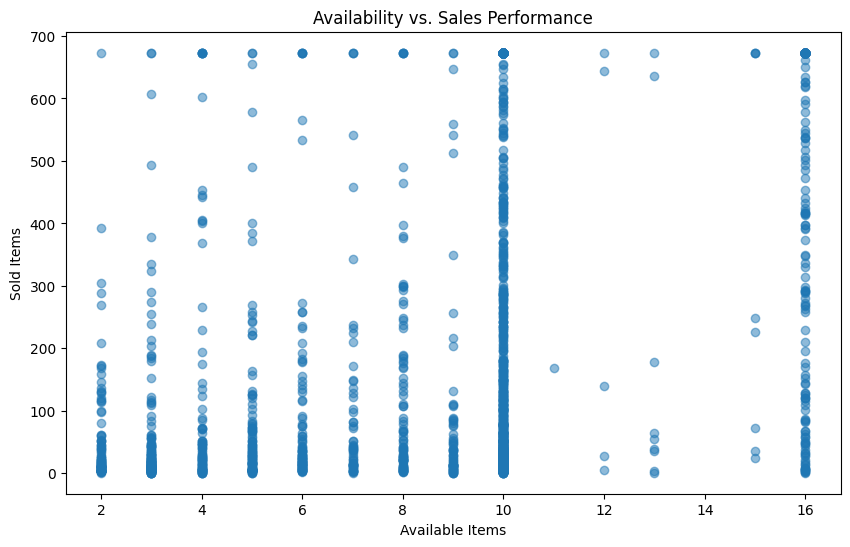

In [ ]:
available_avg = ebay_parfume['available'].mean()
sold_avg = ebay_parfume['sold'].mean()

print(f"Average Availability: {available_avg:.2f}")
print(f"Average Sold: {sold_avg:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(ebay_parfume['available'], ebay_parfume['sold'], alpha=0.5)
plt.xlabel('Available Items')
plt.ylabel('Sold Items')
plt.title('Availability vs. Sales Performance')
plt.show()

 Beberapa outlier menunjukkan listingan dengan ketersediaan tinggi dan jumlah penjualan yang signifikan.

*   Plot sebar menunjukkan hubungan antara barang yang tersedia dan barang yang terjual.
*   Sebagian besar item memiliki ketersediaan yang lebih rendah dan jumlah item yang terjual juga lebih sedikit.
*   Beberapa outlier menunjukkan listingan dengan ketersediaan tinggi dan jumlah penjualan yang signifikan.





In [ ]:
# Compare average prices
avg_price_men = mens_parfume['price'].mean()
avg_price_women = womens_parfume['price'].mean()
print(f"Average price of men's perfumes: ${avg_price_men:.2f}")
print(f"Average price of women's perfumes: ${avg_price_women:.2f}")

Average price of men's perfumes: $46.48
Average price of women's perfumes: $39.89


In [ ]:
# Compare total sales
total_sales_men = mens_parfume['sold'].sum()
total_sales_women = womens_parfume['sold'].sum()
print(f"Total sales of men's perfumes: {total_sales_men}")
print(f"Total sales of women's perfumes: {total_sales_women}")

Total sales of men's perfumes: 761669.0
Total sales of women's perfumes: 489364.0


In [ ]:
# Compare brand representation
mens_brands = mens_parfume['brand'].nunique()
womens_brands = womens_parfume['brand'].nunique()
print(f"Number of unique brands in men's perfumes: {mens_brands}")
print(f"Number of unique brands in women's perfumes: {womens_brands}")

Number of unique brands in men's perfumes: 246
Number of unique brands in women's perfumes: 247


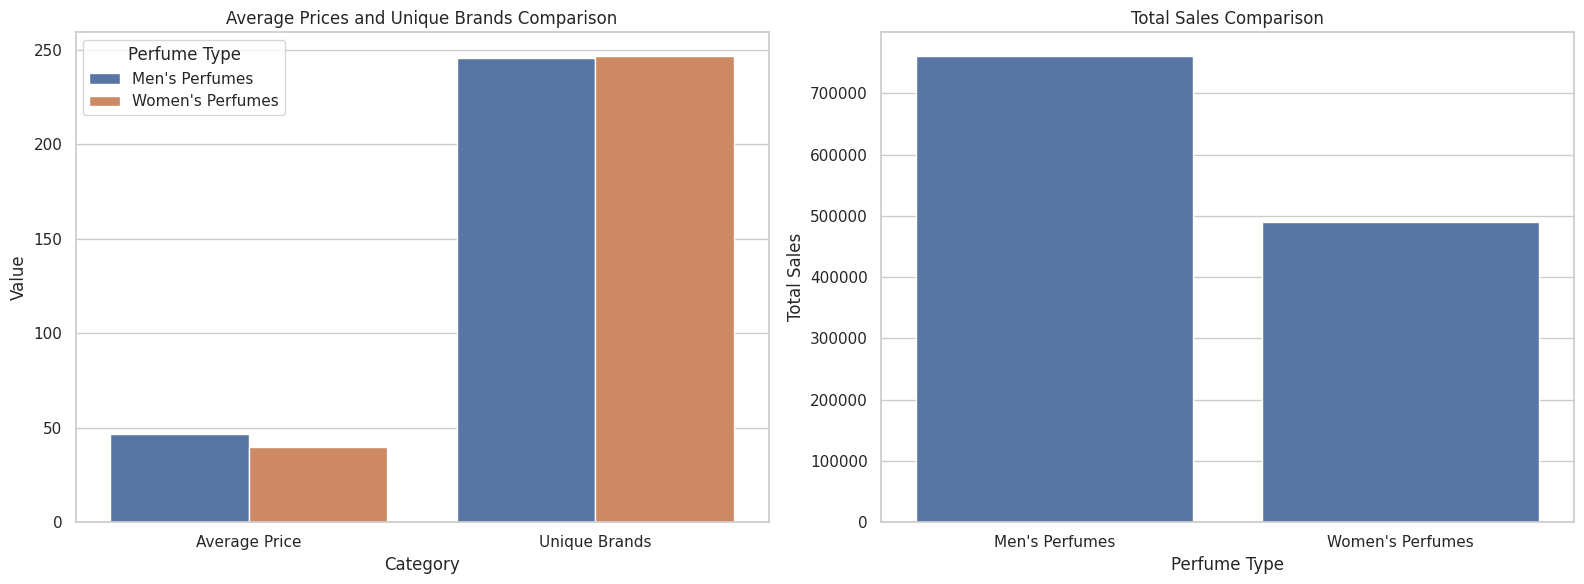

In [ ]:
# Create data for visualization
comparison_data = {
    'Category': ['Average Price', 'Unique Brands'],
    "Men's Perfumes": [avg_price_men, mens_brands],
    "Women's Perfumes": [avg_price_women, womens_brands]
}

comparison_df = pd.DataFrame(comparison_data)

# Melt the dataframe for easier plotting with seaborn
melted_comparison_df = comparison_df.melt(id_vars='Category', var_name='Perfume Type', value_name='Value')

# Plot the average prices and unique brands
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot average prices and unique brands
sns.barplot(x='Category', y='Value', hue='Perfume Type', data=melted_comparison_df, ax=ax[0])
ax[0].set_title('Average Prices and Unique Brands Comparison')
ax[0].set_ylabel('Value')
ax[0].set_xlabel('Category')

# Plot total sales
total_sales_data = {
    'Perfume Type': ["Men's Perfumes", "Women's Perfumes"],
    'Total Sales': [total_sales_men, total_sales_women]
}
total_sales_df = pd.DataFrame(total_sales_data)

sns.barplot(x='Perfume Type', y='Total Sales', data=total_sales_df, ax=ax[1])
ax[1].set_title('Total Sales Comparison')
ax[1].set_ylabel('Total Sales')
ax[1].set_xlabel('Perfume Type')

# Show the plot
plt.tight_layout()
plt.show()



*   Dari hasil di atas menampilkan bahwa parfum pria lebih mahal ketimbang parfum wanita
*   Walaupun parfume nya lebih mahal, namun jumlah penjualan parfume lebih banyak terjual adalah parfume pria.



# Extrack Data

CSV Export

In [ ]:
# Menyimpan data yang telah diproses ke file CSV baru
# Gantilah 'path_to_processed_ebay_parfume.csv' dengan path yang sesuai untuk menyimpan file hasil preprocessing
ebay_parfume.to_csv('ebay_parfume.csv', index=False)

Excel Export

In [ ]:
# Menyimpan data yang telah diproses ke file Excel
# Gantilah 'path_to_processed_ebay_parfume.xlsx' dengan path yang sesuai untuk menyimpan file hasil preprocessing
ebay_parfume.to_excel('ebay_parfume_process.xlsx', index=False)

# Geographical Distibution

## Location Analysis

Mengidentifikasi lokasi sebagian besar barang dapat membantu logistik dan analisis target pasar.

In [ ]:
location_counts = ebay_parfume['itemLocation'].value_counts().head(10)
print(location_counts)

itemLocation
Dallas, Texas, United States             267
Hackensack, New Jersey, United States    190
Brooklyn, New York, United States        111
Miami, Florida, United States             73
Edison, New Jersey, United States         61
Houston, Texas, United States             47
Detroit, Michigan, United States          47
New York, New York, United States         40
Katy, Texas, United States                40
Warren, Michigan, United States           32
Name: count, dtype: int64


In [ ]:
# Hitung jumlah listing untuk setiap lokasi
location_counts = ebay_parfume['itemLocation'].value_counts().reset_index()
location_counts.columns = ['itemLocation', 'Listings_Count']

# Pilih 10 lokasi teratas
top_locations = location_counts.head(10)

# Buat bar chart menggunakan Plotly
fig = go.Figure(data=[go.Bar(
    x=top_locations['itemLocation'],
    y=top_locations['Listings_Count'],
    marker_color='#1f77b4'
)])

fig.update_layout(
    title='Top 10 Locations by Number of Listings',
    xaxis_title='Location',
    yaxis_title='Number of Listings',
    xaxis_tickangle=-45
)

fig.show()

NameError: name 'go' is not defined

In [ ]:
import plotly.express as px
ebay_parfume['Country'] = ebay_parfume['itemLocation'].str.split(',').str[-1].str.strip()

# Group by country and calculate total sales
country_sales = ebay_parfume.groupby('Country')['sold'].sum().reset_index()

# Sort countries by total sales in descending order
country_sales = country_sales.sort_values('sold', ascending=False)

# Create a choropleth map
fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names',
    color='sold',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Geographical Distribution of Perfume Sales'
)

# Update layout for better visualization
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [ ]:
# Analisis jumlah penjualan berdasarkan lokasi
sales_by_location = ebay_parfume.groupby('Country')['sold'].sum().reset_index()
print(sales_by_location)

           Country        sold
0           Brazil     177.000
1         Bulgaria     163.000
2           Canada     803.000
3            China     878.000
4   Estados Unidos      51.000
5        Hong Kong    3442.000
6            India     453.000
7           Israel      37.000
8            Japan      24.000
9         Pakistan      20.000
10          Poland     100.000
11        Portugal      30.000
12          Taiwan     362.000
13   United States  365309.875


In [ ]:
# Analisis jumlah penjualan berdasarkan lokasi dan tipe produk
sales_by_location_and_type = ebay_parfume.groupby(['Country', 'type'])['sold'].sum().unstack().fillna(0)
print(sales_by_location_and_type)

type            Eau de Cologne  Eau de Parfum  Eau de Toilette  Fragrances  \
Country                                                                      
Brazil                   0.000        177.000              0.0       0.000   
Bulgaria                 0.000        163.000              0.0       0.000   
Canada                 122.000        267.000            320.0       0.000   
China                    0.000        166.000            112.0       0.000   
Estados Unidos           0.000         51.000              0.0       0.000   
Hong Kong              167.000       1802.000           1247.0       0.000   
India                    0.000        453.000              0.0       0.000   
Israel                   0.000         37.000              0.0       0.000   
Japan                    0.000          0.000             24.0       0.000   
Pakistan                 0.000         20.000              0.0       0.000   
Poland                   0.000          0.000            100.0  

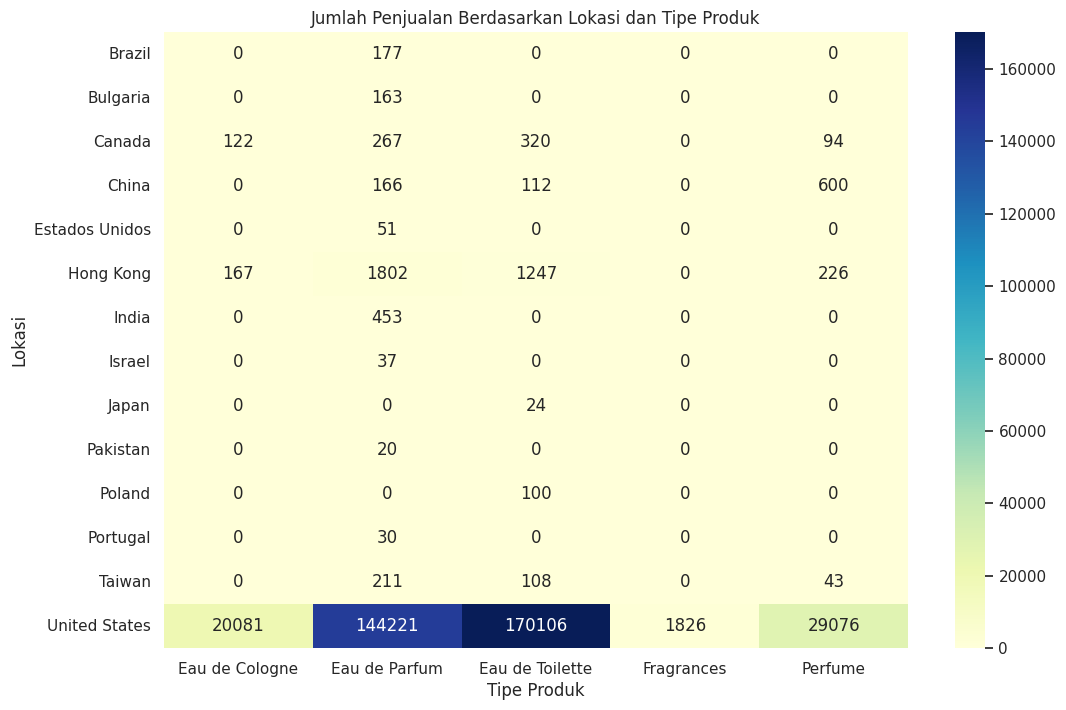

In [ ]:
# Visualisasi heatmap jumlah penjualan berdasarkan lokasi dan tipe produk
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_location_and_type, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Jumlah Penjualan Berdasarkan Lokasi dan Tipe Produk')
plt.xlabel('Tipe Produk')
plt.ylabel('Lokasi')
plt.show()

# Sales Prediction

Mengembangkan model untuk memprediksi penjualan di masa depan berdasarkan data historis, membantu manajemen inventaris dan optimalisasi strategi penjualan.

In [ ]:
# Menampilkan beberapa baris pertama dari data untuk memastikan bahwa data sudah terbaca dengan benar
ebay_parfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sex,volume_ml,City,State,Country,revenue,profit
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99000,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",men,100.0,Allen Park,Michigan,United States,9858.84,9773.85000
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,102.01625,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",men,100.0,Atlanta,Georgia,Canada,4896.78,4794.76375
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00000,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",men,100.0,Dearborn,Michigan,United States,2700.00,2600.00000
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99000,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",men,100.0,Reinholds,Pennsylvania,United States,7153.41,7108.42000
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Perfume,16.91000,US $16.91,10.0,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",men,100.0,Brooklyn,New York,United States,2637.96,2621.05000


## extract columns numerik to excel

In [ ]:
# Extract only numeric columns
numeric_columns = ebay_parfume.select_dtypes(include=[int, float]).columns
numeric_df = ebay_parfume[numeric_columns]
# Save the numeric columns to an Excel file
numeric_df.to_excel('ebay_parfume_numeric.xlsx', index=False)

In [ ]:
numeric_df.head()

,price,available,sold,volume_ml,revenue,profit
0,84.99000,10.0,116.0,100.0,9858.84,9773.85000
1,102.01625,8.0,48.0,100.0,4896.78,4794.76375
2,100.00000,10.0,27.0,100.0,2700.00,2600.00000
3,44.99000,2.0,159.0,100.0,7153.41,7108.42000
4,16.91000,10.0,156.0,100.0,2637.96,2621.05000


In [ ]:
# Memisahkan kolom 'profit' sebagai y dan sisanya sebagai x
y = numeric_df['profit']
x = numeric_df.drop(columns=['profit'])

## Train dan split data

In [ ]:
# Split data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Pemilihan Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Pelatihan Model
model.fit(X_train, y_train)

LinearRegression()

## Prediksi

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

In [ ]:
ebay_parfume.describe()

,price,available,sold,volume_ml,revenue,profit
count,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000
mean,41.157161,8.680000,185.924937,100.0,6510.840456,6469.683295
std,25.355961,3.807998,242.710827,0.0,10009.401945,10005.314323
min,1.990000,2.000000,1.000000,100.0,12.000000,0.000000
25%,21.972500,6.000000,15.000000,100.0,529.092500,485.672500
50%,34.040000,10.000000,51.000000,100.0,1814.515000,1766.120000
75%,53.990000,10.000000,278.250000,100.0,8885.952500,8850.992500
max,102.016250,16.000000,673.125000,100.0,68669.688281,68567.672031


## Evaluasi Model

In [ ]:
# Evaluasi Model
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R Square (r2): {r2}')

Mean Absolute Error (MAE): 1.393505755231672e-11
Mean Squared Error (MSE): 3.18890361939812e-22
Root Mean Squared Error (RMSE): 1.7857501559283484e-11
R Square (r2): 1.0


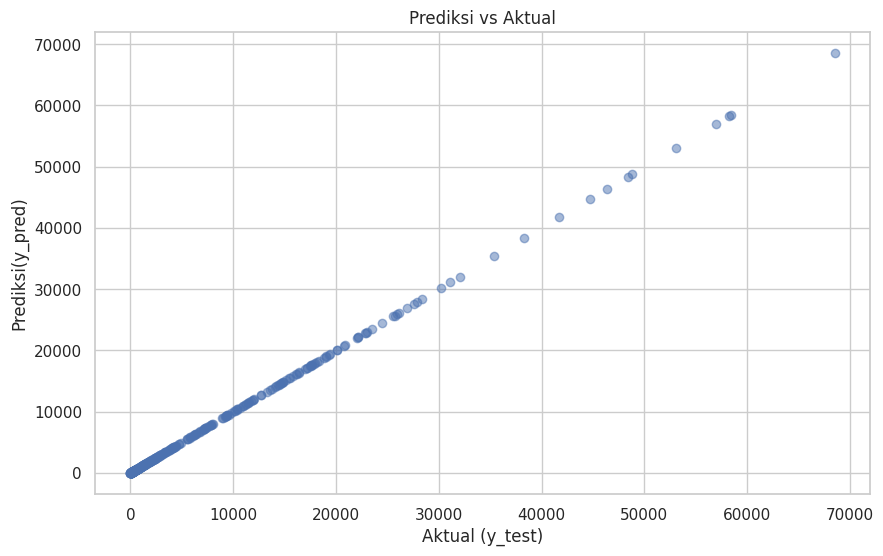

In [ ]:
# Visualisasi Hasil
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Aktual (y_test)')
plt.ylabel('Prediksi(y_pred)')
plt.title('Prediksi vs Aktual')
plt.show()

Berdasarkan data prediksi (y_pred) berada sangat dekat dengan garis identitas
𝑦
=
𝑥
y=x, menunjukkan bahwa prediksi model regresi linear cukup akurat untuk sebagian besar data. Ini berarti model mampu menangkap hubungan linear antara fitur-fitur input dan profit yang sebenarnya (y_test).

In [ ]:
X_test

,price,available,sold,volume_ml,revenue
1860,9.39,10.0,336.000,100.0,3155.0400
353,86.72,10.0,673.125,100.0,58373.4000
1333,32.99,6.0,79.000,100.0,2606.2100
905,44.99,10.0,13.000,100.0,584.8700
1289,27.26,16.0,673.125,100.0,18349.3875
...,...,...,...,...,...
965,29.74,16.0,578.000,100.0,17189.7200
1284,49.81,3.0,30.000,100.0,1494.3000
1739,10.35,10.0,182.000,100.0,1883.7000
261,18.10,16.0,210.000,100.0,3801.0000


In [ ]:
X_test['y_prediksi'] = y_pred

In [ ]:
X_test.head()

,price,available,sold,volume_ml,revenue,y_prediksi
1860,9.39,10.0,336.000,100.0,3155.0400,3145.6500
353,86.72,10.0,673.125,100.0,58373.4000,58286.6800
1333,32.99,6.0,79.000,100.0,2606.2100,2573.2200
905,44.99,10.0,13.000,100.0,584.8700,539.8800
1289,27.26,16.0,673.125,100.0,18349.3875,18322.1275


## Hasil Prediksi

In [ ]:
# Mengurutkan berdasarkan total prediksi profit dan mengambil 10 besar
top_5_profit = X_test.sort_values(by='y_prediksi', ascending=False).head(10)

# Menampilkan hasil analisis
print("Top 10 Parfum yang Banyak Diminati Berdasarkan Volume ml dan Type dengan Prediksi Profit:")
print(top_5_profit)

Top 10 Parfum yang Banyak Diminati Berdasarkan Volume ml dan Type dengan Prediksi Profit:
          price  available     sold  volume_ml       revenue    y_prediksi
628   102.01625       10.0  673.125      100.0  68669.688281  68567.672031
1265   86.99000       10.0  673.125      100.0  58555.143750  58468.153750
353    86.72000       10.0  673.125      100.0  58373.400000  58286.680000
366    84.73000       10.0  673.125      100.0  57033.881250  56949.151250
383    78.99000       10.0  673.125      100.0  53170.143750  53091.153750
554    72.56000       10.0  673.125      100.0  48841.950000  48769.390000
374    71.98000       10.0  673.125      100.0  48451.537500  48379.557500
218   102.01625       10.0  456.000      100.0  46519.410000  46417.393750
944    66.52000       10.0  673.125      100.0  44776.275000  44709.755000
453    62.08000       10.0  673.125      100.0  41787.600000  41725.520000
